In [1]:
#===========================IMPORT LIBRARIES===========================#

import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation in dataframes
import matplotlib.colors as colors

import sklearn.metrics as metrics 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes # for zoomed in plots
from mpl_toolkits.axes_grid1.inset_locator import mark_inset # for zoomed in plots

#===============SET PARAMETERS FOR CUSTOM PLOTTING====================#

# Set the inside ticks to be default
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

# Set font size of x and y labels to be 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#EE334E',  # Olynmpic Red
    '#00A651',  # Olympic Green
    '#FCB131', # Olympic Yellow
    '#ba55d3',  # Medium Orchid
    '#00ced1',  # Dark Turquoise
    '#a89078', #Pastel brown
    '#e9967a',  # Dark Salmon
    '#66cdaa',   # Medium Aquamarine
    '#db7093'  # Pale Violet Red
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

In [14]:
#===========================fUNCTIONS===========================#

def load_zenith_results(file_path):
    results = pd.read_csv(file_path)
    true_zenith = results['cos_zenith']
    predicted_zenith = results['cos_zenith_pred']
    #kappa = results['zenith_kappa']
    return true_zenith, predicted_zenith #, kappa

def plot_angle_dist(true_labels, predicted_labels, name, save_path):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(true_labels, bins=100, range=(0, np.pi), histtype='step', label='True Zenith')
    ax.hist(predicted_labels, bins=100, range=(0, np.pi), histtype='step', label='Predicted Zenith')
    ax.set_xlabel('Zenith Angle (rad)')
    ax.set_ylabel('Counts')
    ax.legend()
    ax.set_yscale('log')


    plt.savefig(save_path + name + '/' + name + '_cos_zenith_dist.png', dpi=300)
    plt.show()

def plot_zenith_residual(true_labels, predicted_labels, name, save_path):
    residual = predicted_labels - true_labels

    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(residual, bins=100, range=(-3, 3), histtype='step')
    ax.set_xlabel('Zenith Residual (rad)')
    ax.set_ylabel('Counts')

    plt.savefig(save_path + name + '/' + name + '_cos_zenith_residual.png', dpi=300)
    plt.show()

def plot_2D_true_vs_pred(true_labels, predicted_labels, name, save_path):

    bins_zenith_color = np.linspace(-0.1, 3.2, 100)

    fig, ax = plt.subplots(figsize=(10, 6))
    hist = ax.hist2d(predicted_labels, true_labels, bins=bins_zenith_color, norm=colors.LogNorm())
    ax.set_xlabel('Predicted Zenith Angle (rad)')
    ax.set_ylabel('True Zenith Angle (rad)')
    
    # Add a colorbar
    cbar = fig.colorbar(hist[3], ax=ax)
    cbar.set_label('Counts')

    perf_line = np.linspace(0, 3.1, 100)
    ax.plot(perf_line, perf_line, 'r--', label='Perfect Prediction')

    plt.savefig(save_path + name + '/' + name + '_cos_zenith_2D.png', dpi=300)
    plt.show()

## Validation results

In [11]:
validation_result_zenith = '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Results_CSVs/results_validation.csv'

true_cos_zenith, predicted_cos_zenith = load_zenith_results(validation_result_zenith)
true_zenith = np.arccos(true_cos_zenith)
predicted_zenith = np.arccos(predicted_cos_zenith)

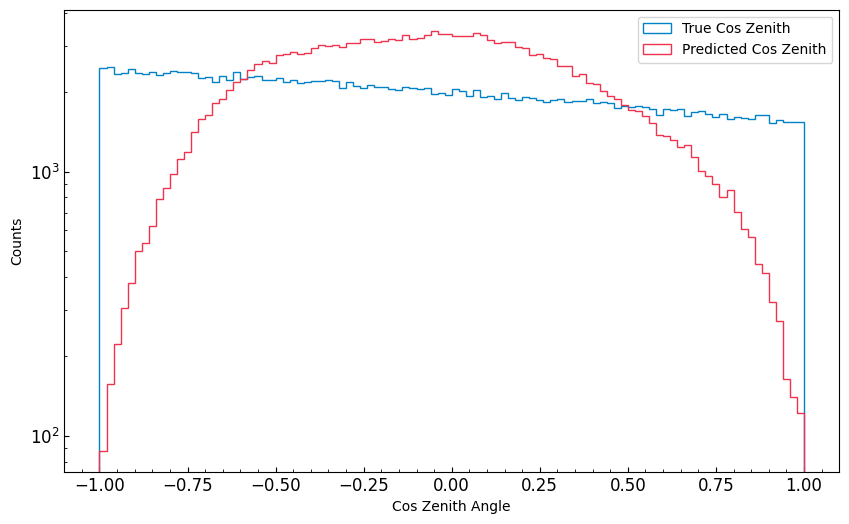

In [23]:
# Plot the distributions of true and predicted cos(zenith) values
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(true_cos_zenith, bins=100, range=(-1, 1), histtype='step', label='True Cos Zenith')
ax.hist(predicted_cos_zenith, bins=100, range=(-1, 1), histtype='step', label='Predicted Cos Zenith')
ax.set_xlabel('Cos Zenith Angle')
ax.set_ylabel('Counts')
ax.legend()
ax.set_yscale('log')

plt.show()

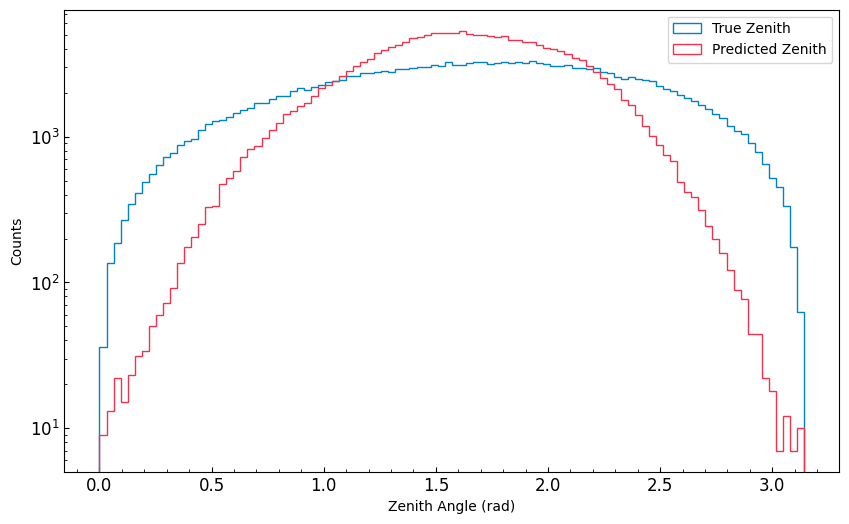

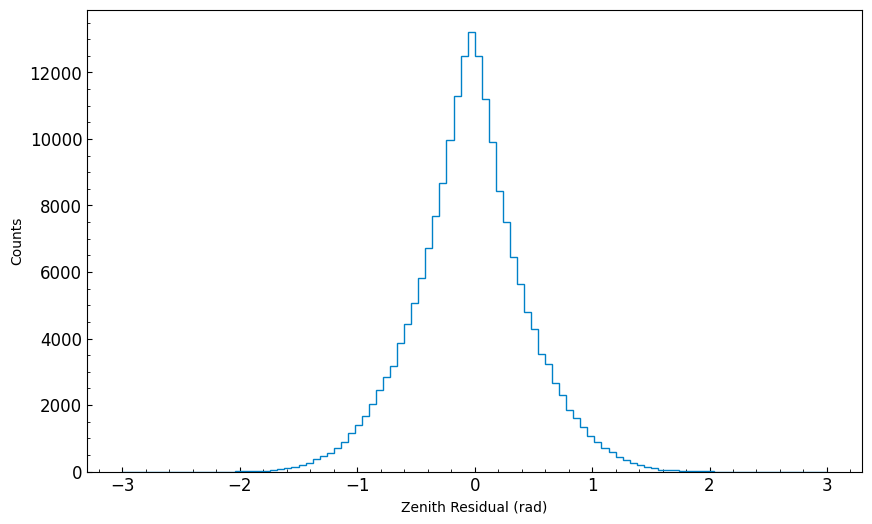

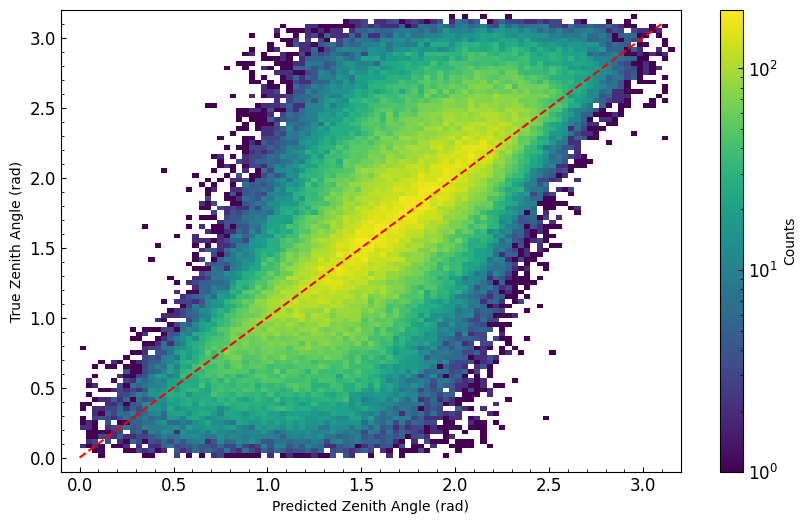

In [15]:
# Plot with kappa_mask = False
plot_angle_dist(true_zenith, predicted_zenith, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Plots/')
plot_zenith_residual(true_zenith, predicted_zenith, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Plots/')
plot_2D_true_vs_pred(true_zenith, predicted_zenith, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Plots/')

In [18]:
# Calculate the mean residual
residual = predicted_zenith - true_zenith
mean_residual = np.mean(residual)
print('Mean Residual:', mean_residual)

# Calculate the standard deviation of the residual
std_residual = np.std(residual)
print('Standard Deviation of Residual:', std_residual)

Mean Residual: -0.03663314380966401
Standard Deviation of Residual: 0.4775584903779121


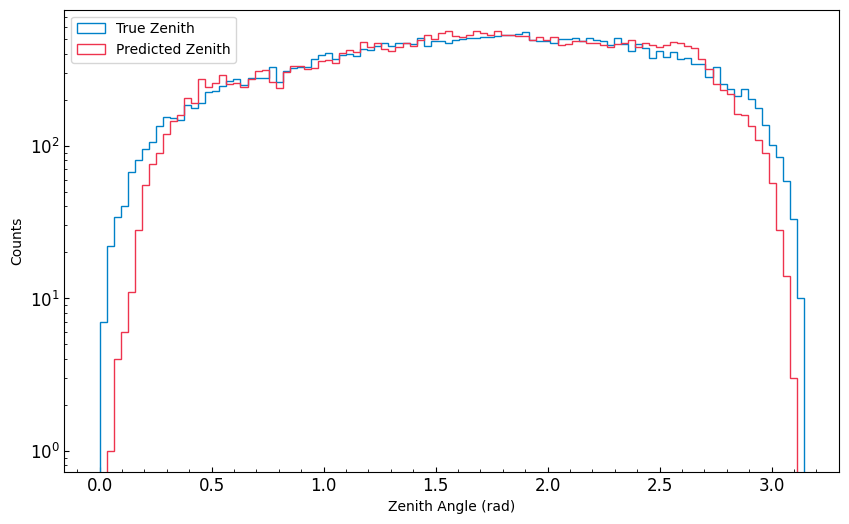

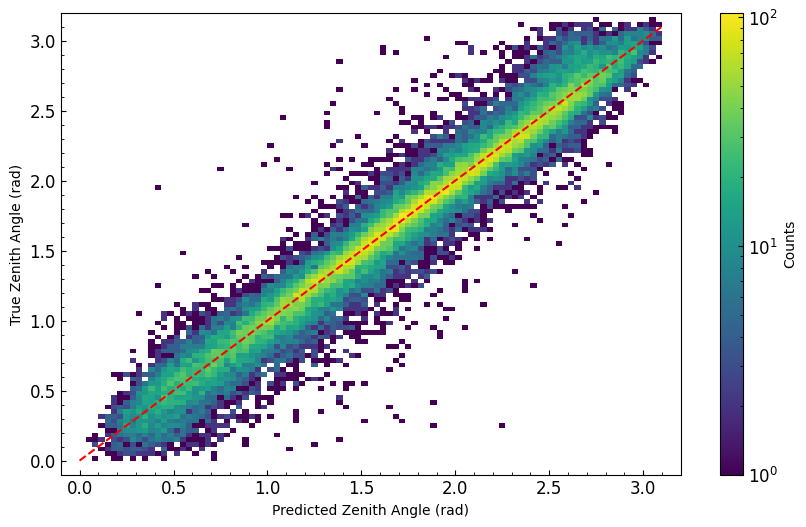

In [104]:
# Plot with kappa_mask = True
plot_angle_dist(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=True)
plot_2D_true_vs_pred(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=True)

## Test results

In [4]:
test_result_zenith = '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Result_CSVs/results_test.csv'

true_zenith, predicted_zenith, kappa = load_zenith_results(test_result_zenith)

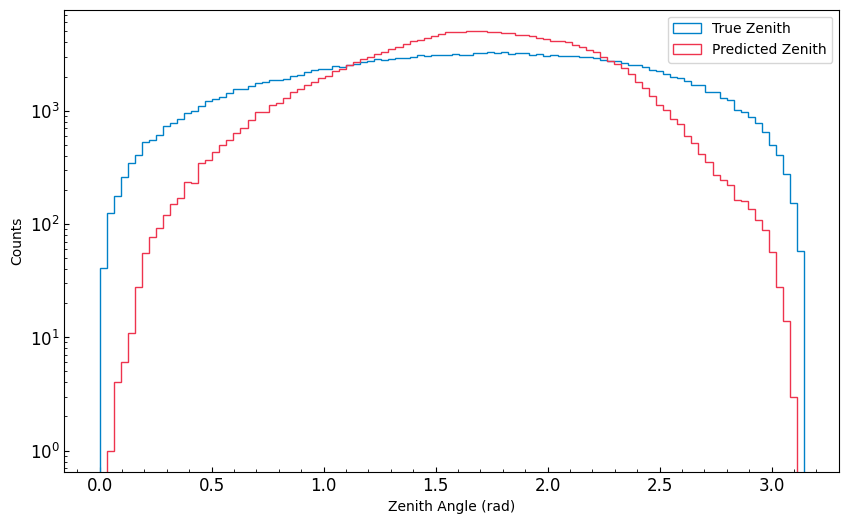

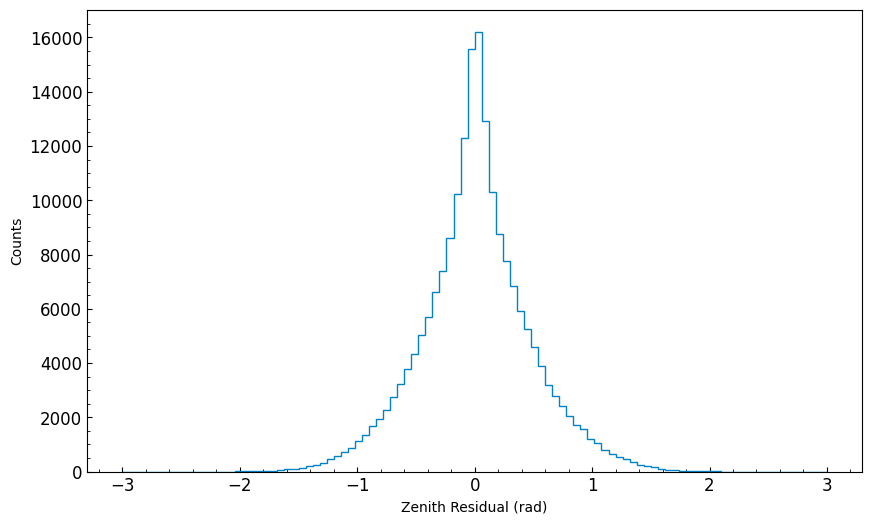

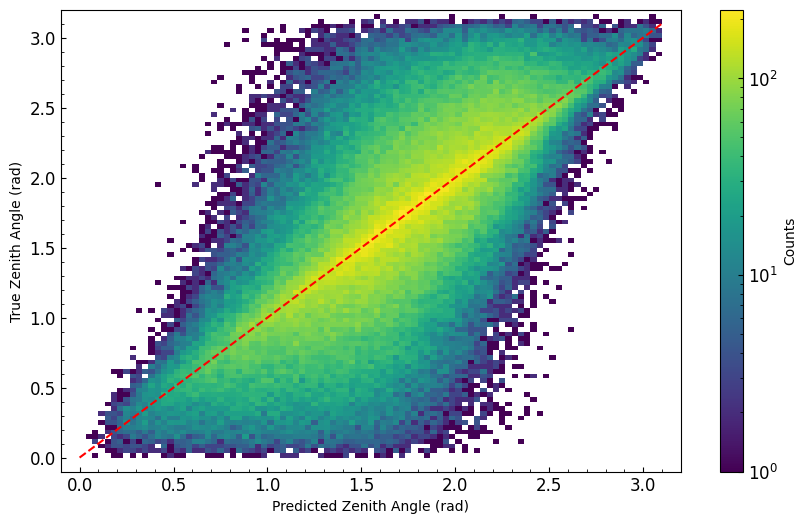

In [5]:
# Plot with kappa_mask = False for test set
plot_angle_dist(true_zenith, predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)
plot_zenith_residual(true_zenith, predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)
plot_2D_true_vs_pred(true_zenith, predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)

In [11]:
# Use quantiles to correct the predicted zenith angles
   # Forces the zenith distributions to be the same

# Create index array for true zenith for increasing order
index = np.argsort(true_zenith)
print(index)

sorted_true_zenith = true_zenith[index]
print(sorted_true_zenith)

# Sort the predicted zenith angles for increasing order
index_pred = np.argsort(predicted_zenith)
print(index_pred)

sorted_predicted_zenith = predicted_zenith[index_pred]
print(sorted_predicted_zenith)

# Force the predicted zenith angles to be the same as the true zenith angles (quantile correction)
corrected_predicted_zenith = np.zeros(len(sorted_predicted_zenith))
corrected_predicted_zenith[index_pred] = sorted_true_zenith



0          84968
1          71445
2          86428
3          78189
4          50922
           ...  
199995    132803
199996     46092
199997    117899
199998     49134
199999     31774
Name: zenith, Length: 200000, dtype: int64
84968     0.000308
71445     0.002647
86428     0.005690
78189     0.005754
50922     0.007075
            ...   
132803    3.135661
46092     3.137084
117899    3.137356
49134     3.139814
31774     3.140121
Name: zenith, Length: 200000, dtype: float64
0         181179
1          80345
2         137403
3          86676
4         122929
           ...  
199995    103762
199996    162339
199997     37895
199998    125457
199999    122018
Name: zenith_pred, Length: 200000, dtype: int64
181179    0.059370
80345     0.068663
137403    0.083375
86676     0.084298
122929    0.091168
            ...   
103762    3.079636
162339    3.081699
37895     3.095564
125457    3.095988
122018    3.097479
Name: zenith_pred, Length: 200000, dtype: float64


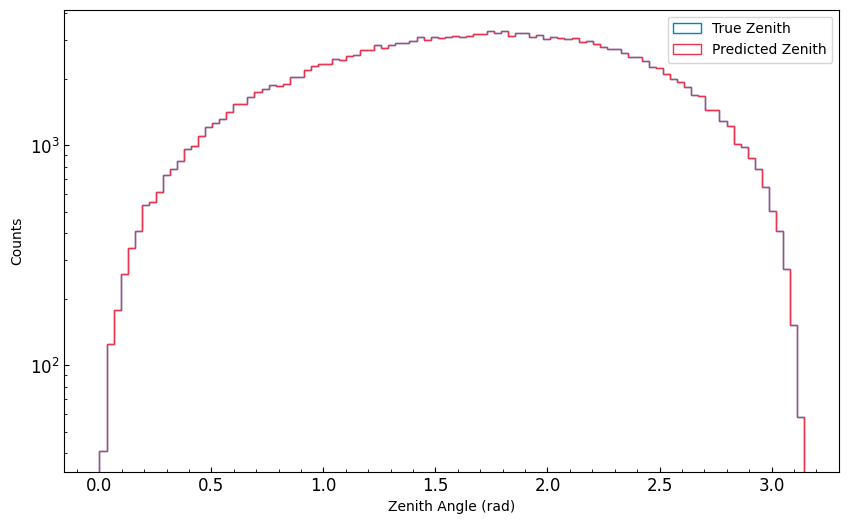

In [15]:
plot_angle_dist(true_zenith, corrected_predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)
#plot_angle_dist(true_zenith, predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)

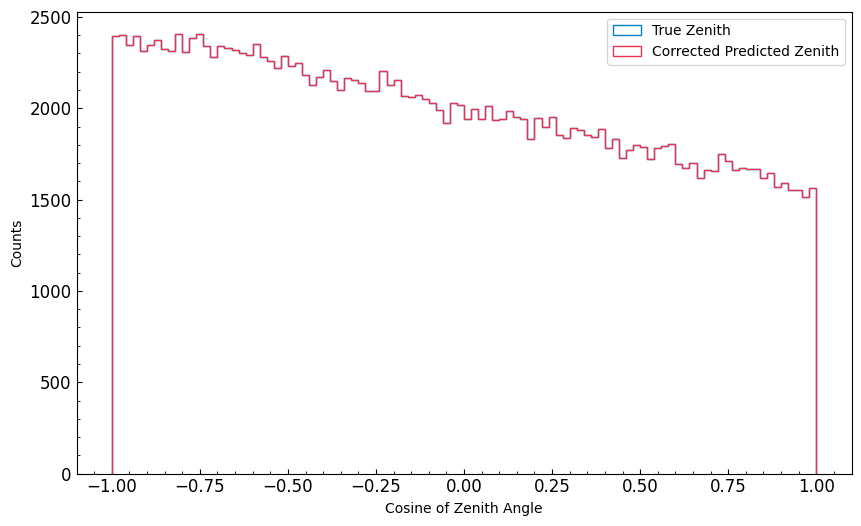

In [23]:
# Plot the disribution of cosine of zenith angles
cos_true_zenith = np.cos(true_zenith)
cos_predicted_zenith = np.cos(predicted_zenith)
cos_corrected_predicted_zenith = np.cos(corrected_predicted_zenith)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cos_true_zenith, bins=100, range=(-1, 1), histtype='step', label='True Zenith')
#ax.hist(cos_predicted_zenith, bins=100, range=(-1, 1), histtype='step', label='Predicted Zenith')
ax.hist(cos_corrected_predicted_zenith, bins=100, range=(-1, 1), histtype='step', label='Corrected Predicted Zenith')
ax.set_xlabel('Cosine of Zenith Angle')
ax.set_ylabel('Counts')
ax.legend()
#ax.set_yscale('log')
#plt.savefig('/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/Test/cos_zenith_dist.png', dpi=300)
plt.show()

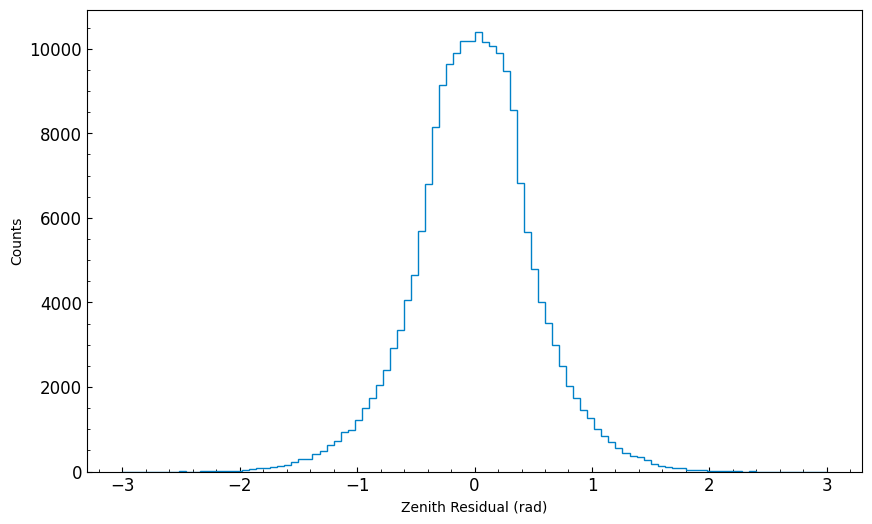

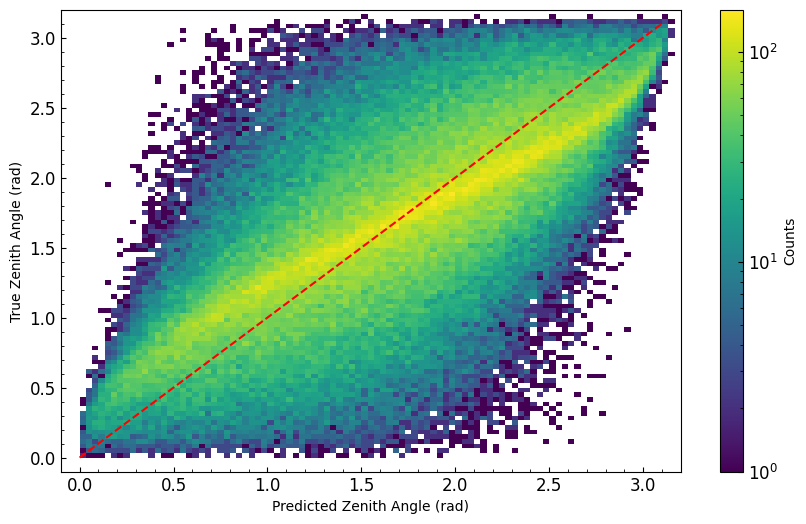

In [14]:
# Plot the residuals and 2D plots for the corrected predicted zenith angles
plot_zenith_residual(true_zenith, corrected_predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)
plot_2D_true_vs_pred(true_zenith, corrected_predicted_zenith, kappa, 'Test', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)

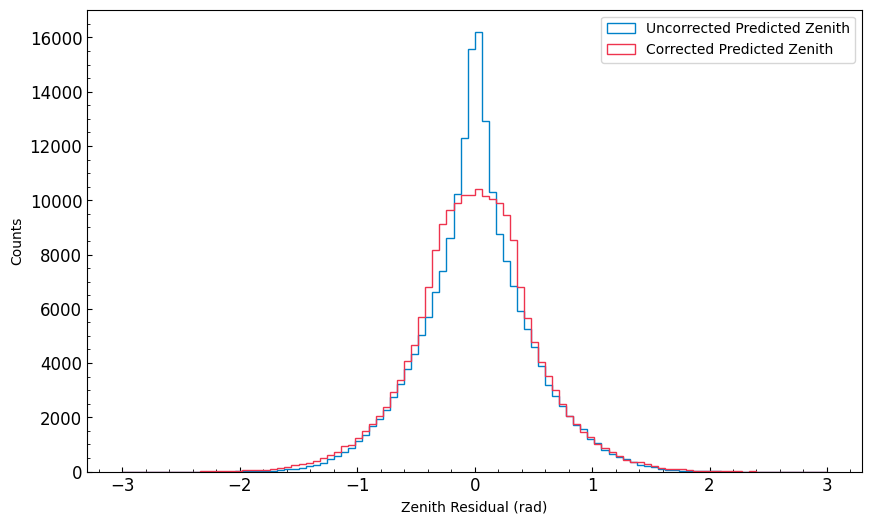

In [16]:
# Plot the residuals for corrected and uncorrected predicted zenith angles on the same plot
fig, ax = plt.subplots(figsize=(10, 6))
residual = predicted_zenith - true_zenith
corrected_residual = corrected_predicted_zenith - true_zenith
ax.hist(residual, bins=100, range=(-3, 3), histtype='step', label='Uncorrected Predicted Zenith')
ax.hist(corrected_residual, bins=100, range=(-3, 3), histtype='step', label='Corrected Predicted Zenith')
ax.set_xlabel('Zenith Residual (rad)')
ax.set_ylabel('Counts')
ax.legend()

#plt.savefig('/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/Test/Test_zenith_residual_comparison.png', dpi=300)
plt.show()

In [19]:
# Calculate the angular resolution for the corrected predicted zenith angles and the uncorrected predicted zenith angles
angular_resolution = np.arccos(np.cos(true_zenith) * np.cos(predicted_zenith) + np.sin(true_zenith) * np.sin(predicted_zenith))
corrected_angular_resolution = np.arccos(np.cos(true_zenith) * np.cos(corrected_predicted_zenith) + np.sin(true_zenith) * np.sin(corrected_predicted_zenith))

# print
print('Angular Resolution for Uncorrected Predicted Zenith Angles:')
print('Mean:', np.mean(angular_resolution))
print('Median:', np.median(angular_resolution))
print('Standard Deviation:', np.std(angular_resolution))
print('Angular Resolution for Corrected Predicted Zenith Angles:')

print('Mean:', np.mean(corrected_angular_resolution))
print('Median:', np.median(corrected_angular_resolution))
print('Standard Deviation:', np.std(corrected_angular_resolution))

# Print the mean absolute residuals for the corrected and uncorrected predicted zenith angles
print('Mean Absolute Residual for Uncorrected Predicted Zenith Angles:', np.mean(np.abs(residual)))
print('Mean Absolute Residual for Corrected Predicted Zenith Angles:', np.mean(np.abs(corrected_residual)))


Angular Resolution for Uncorrected Predicted Zenith Angles:
Mean: 0.34830494095944503
Median: 0.2591996028082321
Standard Deviation: 0.3132582180501942
Angular Resolution for Corrected Predicted Zenith Angles:
Mean: 0.387873221146589
Median: 0.3031731298379688
Standard Deviation: 0.3256005832503919
Mean Absolute Residual for Uncorrected Predicted Zenith Angles: 0.3483049409594448
Mean Absolute Residual for Corrected Predicted Zenith Angles: 0.3878732211465149


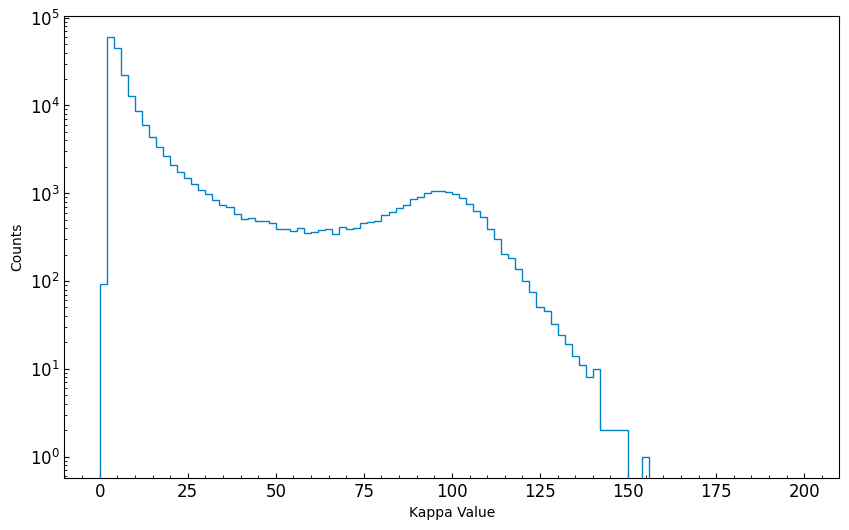

In [8]:
# Plot the distribution of kappa values for the test set
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(kappa, bins=100, range=(0, 200), histtype='step')
ax.set_xlabel('Kappa Value')
ax.set_ylabel('Counts')
ax.set_yscale('log')
plt.show()

In [23]:
print(min(kappa))

0.3541003465652466


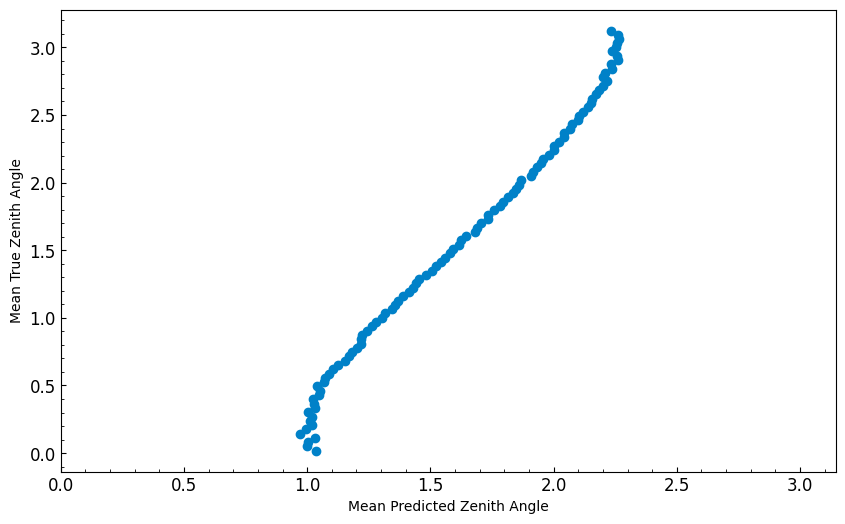

In [12]:
# Do a second type of correction
# Bin the true zenith angles and calculate the mean predicted zenith angles for each bin

# Bin the true zenith angles
bins = np.linspace(0, 3.145, 100)

# Calculate the mean predicted zenith angles for each bin
mean_predicted_zenith = np.zeros(len(bins) - 1)
mean_true_zenith = np.zeros(len(bins) - 1)

for i in range(len(bins) - 1):
    mask = (true_zenith >= bins[i]) & (true_zenith < bins[i + 1])
    mean_predicted_zenith[i] = np.mean(predicted_zenith[mask])
    mean_true_zenith[i] = np.mean(true_zenith[mask])

# Plot a scatter plot of the mean predicted zenith angles vs the mean true zenith angles
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mean_predicted_zenith, mean_true_zenith)
ax.set_xlabel('Mean Predicted Zenith Angle')
ax.set_ylabel('Mean True Zenith Angle')
ax.set_xlim(0, 3.145)
plt.show()


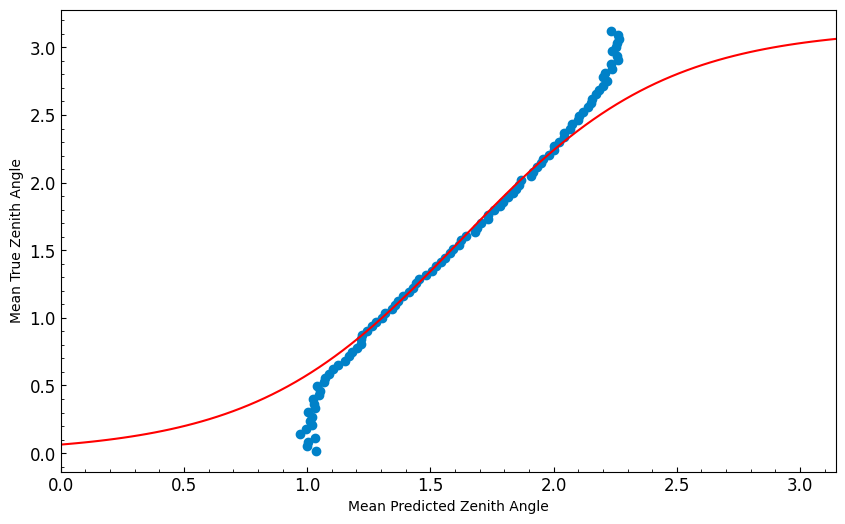

In [20]:
def my_tanh(x):
    return 0.5*(np.pi*np.tanh((x-np.pi/2-0.05)*1.2) + np.pi)

# Plot a scatter plot of the mean predicted zenith angles vs the mean true zenith angles
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mean_predicted_zenith, mean_true_zenith)
ax.set_xlabel('Mean Predicted Zenith Angle')
ax.set_ylabel('Mean True Zenith Angle')
ax.set_xlim(0, 3.145)
ax.plot(np.linspace(0, 3.145, 100), my_tanh(np.linspace(0, 3.145, 100)), 'r')
plt.show()

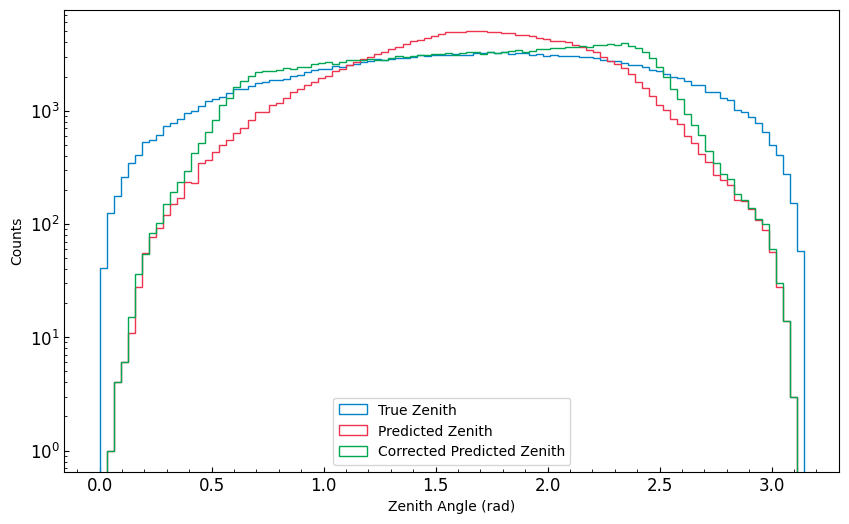

In [29]:
# correct the predicted zenith angles using the tanh function, scale the correction based on kappa values

def correct_zenith_kappa(func, predicted_zenith, kappa):
    full_correct = func(predicted_zenith)
    diff = full_correct - predicted_zenith
    corrected_zenith = predicted_zenith + 3/kappa * diff
    return corrected_zenith

def correct_zenith_mask(func, predicted_zenith):
    # mask predicted zenith below 1.2 or above 2.1
    mask = (predicted_zenith < 1.3) | (predicted_zenith > 2.0)
    corrected_zenith = predicted_zenith.copy()
    corrected_zenith[mask] = func(predicted_zenith[mask])
    return corrected_zenith

corrected_predicted_zenith = correct_zenith(my_tanh, predicted_zenith, kappa)
#corrected_predicted_zenith = correct_zenith_mask(my_tanh, predicted_zenith)

# Plot the distribution of the predicted zenith, corrected predicted zenith angles with the true zenith angles
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(true_zenith, bins=100, range=(0, 3.145), histtype='step', label='True Zenith')
ax.hist(predicted_zenith, bins=100, range=(0, 3.145), histtype='step', label='Predicted Zenith')
ax.hist(corrected_predicted_zenith, bins=100, range=(0, 3.145), histtype='step', label='Corrected Predicted Zenith')
ax.set_xlabel('Zenith Angle (rad)')
ax.set_ylabel('Counts')
ax.legend()
ax.set_yscale('log')
plt.show()

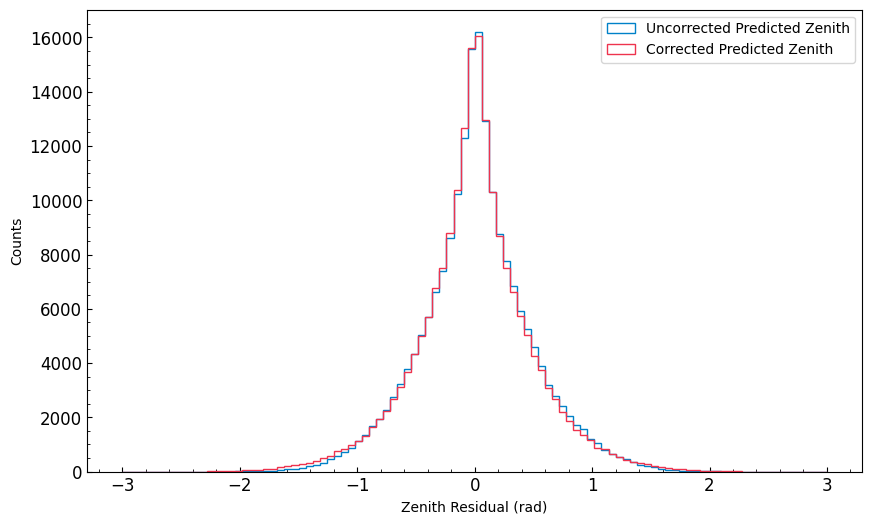

In [30]:
# Plot the residuals for the corrected predicted zenith angles and the uncorrected predicted zenith angles
residual = predicted_zenith - true_zenith
corrected_residual = corrected_predicted_zenith - true_zenith

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(residual, bins=100, range=(-3, 3), histtype='step', label='Uncorrected Predicted Zenith')
ax.hist(corrected_residual, bins=100, range=(-3, 3), histtype='step', label='Corrected Predicted Zenith')
ax.set_xlabel('Zenith Residual (rad)')
ax.set_ylabel('Counts')
ax.legend()
plt.show()